In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
import pandas as pd
import numpy as np 
import pickle as pk
import glob
from fbprophet import Prophet
import sys
sys.path.append('../')
from wiki import utils 
import multiprocessing as mp
total_proc = None
from tqdm import tqdm
from IPython.display import clear_output

In [ ]:
PROPHET_PATH = '../data/prophet/'

In [ ]:
# should break if the dir already exists - avoids accidental overwriting
VERSION = 'v0/' # validation on -60

In [5]:
glob.glob(PROPHET_PATH+'*')

['../data/prophet/v0/0df.f',
 '../data/prophet/v0/0m.pk',
 '../data/prophet/v0/10df.f',
 '../data/prophet/v0/10m.pk',
 '../data/prophet/v0/1df.f',
 '../data/prophet/v0/1m.pk',
 '../data/prophet/v0/2df.f',
 '../data/prophet/v0/2m.pk',
 '../data/prophet/v0/3df.f',
 '../data/prophet/v0/3m.pk',
 '../data/prophet/v0/4df.f',
 '../data/prophet/v0/4m.pk',
 '../data/prophet/v0/5df.f',
 '../data/prophet/v0/5m.pk',
 '../data/prophet/v0/6df.f',
 '../data/prophet/v0/6m.pk',
 '../data/prophet/v0/7df.f',
 '../data/prophet/v0/7m.pk',
 '../data/prophet/v0/8df.f',
 '../data/prophet/v0/8m.pk',
 '../data/prophet/v0/9df.f',
 '../data/prophet/v0/9m.pk']

In [16]:
df = pd.read_feather('../data/prophet/v0/8df.f')

In [17]:
with open('../data/prophet/v0/8m.pk','rb') as file:
    m = pk.load(file)

In [18]:
df

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat,y,train
0,2015-07-01,0.000000,25.532029,0.998226,0.998226,25.532029,25.532029,5.209161,48.734367,0.470045,0.470045,0.470045,0.528182,0.528182,0.528182,0.998226,26.530256,5.0,1.0
1,2015-07-02,0.002045,25.579428,-0.659738,-0.659738,25.579428,25.579428,0.978045,48.371426,-0.079173,-0.079173,-0.079173,-0.580565,-0.580565,-0.580565,-0.659738,24.919690,23.0,1.0
2,2015-07-03,0.004090,25.626827,-3.895277,-3.895277,25.626827,25.626827,-1.536396,42.491950,-2.287550,-2.287550,-2.287550,-1.607727,-1.607727,-1.607727,-3.895277,21.731551,14.0,1.0
3,2015-07-04,0.006135,25.674227,-1.198728,-1.198728,25.674227,25.674227,1.289062,47.282529,1.340845,1.340845,1.340845,-2.539573,-2.539573,-2.539573,-1.198728,24.475498,12.0,1.0
4,2015-07-05,0.008180,25.721626,-3.352680,-3.352680,25.721626,25.721626,-2.017017,45.259435,0.012453,0.012453,0.012453,-3.365134,-3.365134,-3.365134,-3.352680,22.368945,9.0,1.0
5,2015-07-06,0.010225,25.769025,-3.395484,-3.395484,25.769025,25.769025,-0.596511,46.882552,0.680840,0.680840,0.680840,-4.076324,-4.076324,-4.076324,-3.395484,22.373541,9.0,1.0
6,2015-07-07,0.012270,25.816424,-4.805462,-4.805462,25.816424,25.816424,-2.402129,43.973404,-0.137461,-0.137461,-0.137461,-4.668001,-4.668001,-4.668001,-4.805462,21.010962,35.0,1.0
7,2015-07-08,0.014315,25.863823,-4.667892,-4.667892,25.863823,25.863823,-2.764018,44.217188,0.470045,0.470045,0.470045,-5.137937,-5.137937,-5.137937,-4.667892,21.195930,15.0,1.0
8,2015-07-09,0.016360,25.911222,-5.565901,-5.565901,25.911222,25.911222,-2.234917,43.840674,-0.079173,-0.079173,-0.079173,-5.486728,-5.486728,-5.486728,-5.565901,20.345321,14.0,1.0
9,2015-07-10,0.018405,25.958621,-8.005184,-8.005184,25.958621,25.958621,-4.644046,39.877620,-2.287550,-2.287550,-2.287550,-5.717634,-5.717634,-5.717634,-8.005184,17.953437,22.0,1.0


In [19]:
def plot_prophet_forecast(df):
    fig, ax = plt.subplots(1)
    ax.plot(df.ds, df.y, lw=2, label='y', color='blue')


In [20]:
def prophet_plot(df, ax=None, uncertainty=True, plot_cap=True, 
         xlabel='ds',
         ylabel='y'):
    """Plot the Prophet forecast.
    Parameters
    ----------
    fcst: pd.DataFrame output of self.predict.
    ax: Optional matplotlib axes on which to plot.
    uncertainty: Optional boolean to plot uncertainty intervals.
    plot_cap: Optional boolean indicating if the capacity should be shown
        in the figure, if available.
    xlabel: Optional label name on X-axis
    ylabel: Optional label name on Y-axis
    Returns
    -------
    A matplotlib figure.
    """
    if ax is None:
        fig = plt.figure(facecolor='w', figsize=(14, 8))
        ax = fig.add_subplot(111)
    else:
        fig = ax.get_figure()
    df_train = df[df['train'] == 1]
    df_val = df[df['train'] == 0]
    ax.plot(df_train['ds'].values, df_train['y'], 'k')
    ax.plot(df_val['ds'].values, df_val['y'], 'r')
    ax.plot(df['ds'].values, df['yhat'], ls='-', c='#0072B2')
    if 'cap' in df and plot_cap:
        ax.plot(df['ds'].values, df['cap'], ls='--', c='k')
    if uncertainty:
        ax.fill_between(df['ds'].values, df['yhat_lower'],
                        df['yhat_upper'], color='#0072B2',
                        alpha=0.2)
    ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig.tight_layout()

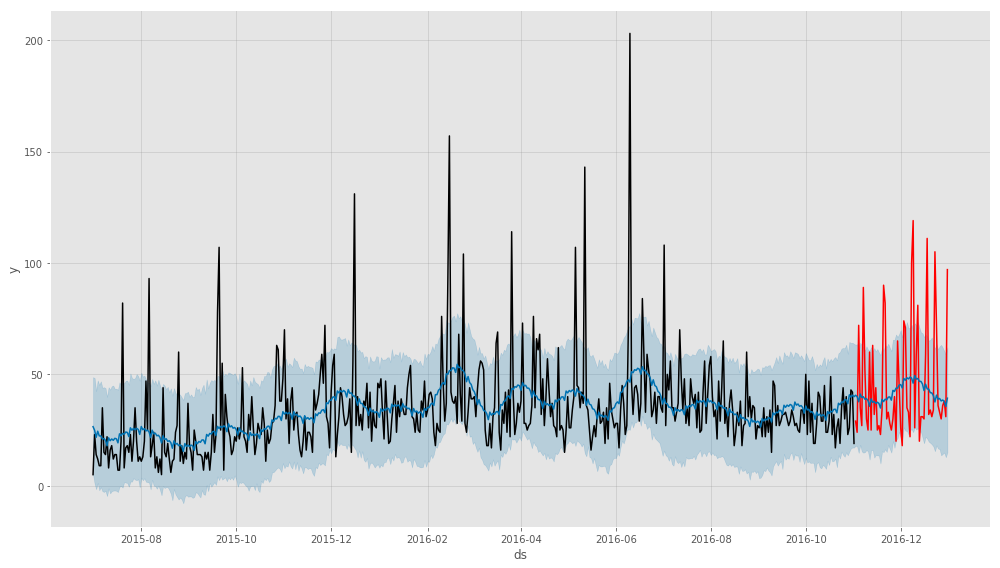

In [21]:
prophet_plot(df)

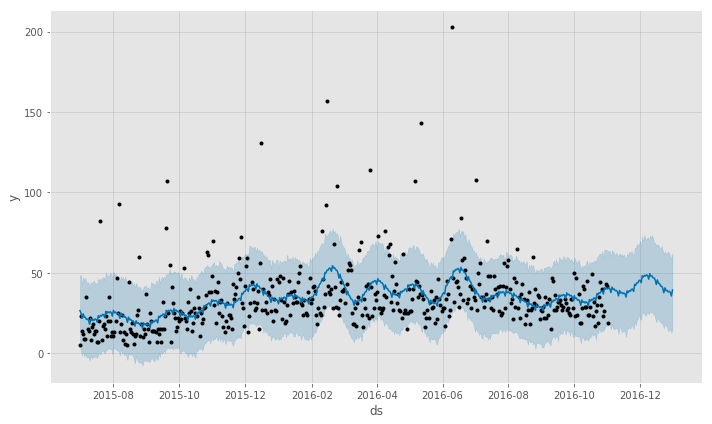

In [23]:
m.plot(df);

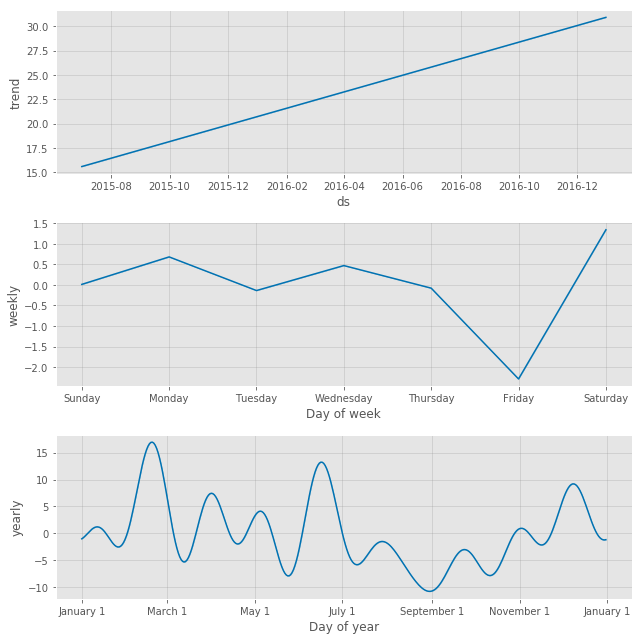

In [16]:
m.plot_components(df);